# Image classification 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

In [2]:
base_dir =  r'data'
folders = os.listdir(base_dir)
print(folders)

['Jeans', 'saree', 'trouser', 'tshirts']


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(250 , 250),
    batch_size= 32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir, 
    target_size=(250, 250),
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 1040 images belonging to 4 classes.
Found 259 images belonging to 4 classes.


In [4]:
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Jeans', 1: 'saree', 2: 'trouser', 3: 'tshirts'}


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (250 , 250 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(4 , activation = 'softmax')])

In [12]:
model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics = 'accuracy')

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 246, 246, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 82, 82, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 78, 78, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5)

In [32]:
train_model= model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,
          batch_size = 64,
          steps_per_epoch = 1040/64,
          validation_steps = 259/64,             
          callbacks = [callback]) 

Epoch 1/20
16/16 [==============================] - 24s 1s/step - loss: 0.0807 - accuracy: 0.9761 - val_loss: 0.2305 - val_accuracy: 0.9250
Epoch 2/20
16/16 [==============================] - 23s 1s/step - loss: 0.0844 - accuracy: 0.9659 - val_loss: 0.1382 - val_accuracy: 0.9563
Epoch 3/20
16/16 [==============================] - 24s 1s/step - loss: 0.1144 - accuracy: 0.9467 - val_loss: 0.2459 - val_accuracy: 0.9187
Epoch 4/20
16/16 [==============================] - 23s 1s/step - loss: 0.1130 - accuracy: 0.9659 - val_loss: 0.1654 - val_accuracy: 0.9375
Epoch 5/20
16/16 [==============================] - 23s 1s/step - loss: 0.1008 - accuracy: 0.9564 - val_loss: 0.3048 - val_accuracy: 0.9187
Epoch 6/20
16/16 [==============================] - 23s 1s/step - loss: 0.0866 - accuracy: 0.9614 - val_loss: 0.1788 - val_accuracy: 0.9438
Epoch 7/20
16/16 [==============================] - 23s 1s/step - loss: 0.0522 - accuracy: 0.9848 - val_loss: 0.2056 - val_accuracy: 0.9500


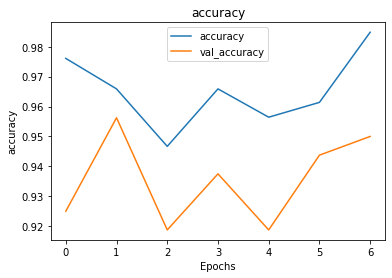

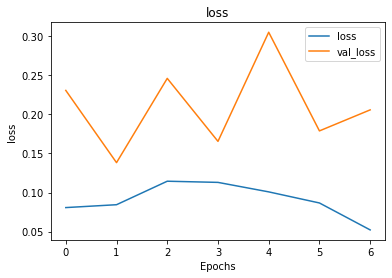

In [33]:
def plot_graphs(train_model, value):
      plt.plot(train_model.history[value])
      plt.plot(train_model.history['val_'+value])
      plt.title(value)
      plt.xlabel("Epochs")
      plt.ylabel(value)
      plt.legend([value, 'val_'+value])
      plt.show()

plot_graphs(train_model, "accuracy")
plot_graphs(train_model, "loss")

In [34]:
def prediction(test_path):
    img = image.load_img(test_path , target_size = (250 , 250))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
        
    plt.title('Image')
    plt.axis('off')
    plt.imshow(img)
        
    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]
        
    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

Prediction Value:  0.99964356
Classified: saree


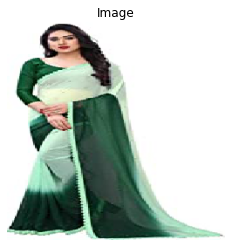

In [35]:
prediction('data/saree/saree1.jpg')

Prediction Value:  1.0
Classified: Jeans


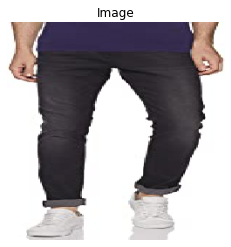

In [36]:
prediction('data/jeans/jean1.jpg')

Prediction Value:  0.99999774
Classified: trouser


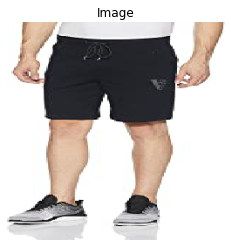

In [37]:
prediction('data/trouser/trouser1.jpg')

Prediction Value:  0.99713707
Classified: tshirts


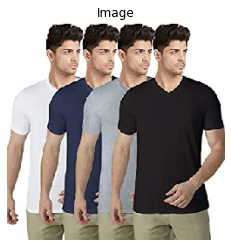

In [38]:
prediction('data/tshirts/tshirt1.jpg')